In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
insurance_data = pd.read_csv("insurance.txt", delimiter=',')

In [3]:
insurance_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [4]:
norm_insu_data = ((insurance_data-insurance_data.mean())/(insurance_data.std()))
norm_insu_data.insert(0, 'x0', 1) #x0 is appeneded to allow for the zeroth order term

In [5]:
#normalised data frame

norm_insu_data

,x0,age,bmi,children,charges
0,1,-1.438227,-0.453151,-0.908274,0.298472
1,1,-1.509401,0.509431,-0.078738,-0.953333
2,1,-0.797655,0.383164,1.580335,-0.728402
3,1,-0.441782,-1.305043,-0.908274,0.719574
4,1,-0.512957,-0.292447,-0.908274,-0.776512
...,...,...,...,...,...
1333,1,0.768185,0.050278,1.580335,-0.220468
1334,1,-1.509401,0.206062,-0.908274,-0.913661
1335,1,-1.509401,1.014499,-0.908274,-0.961237
1336,1,-1.295877,-0.797515,-0.908274,-0.930014


In [6]:
#creating a list of 20 data_frames that have been shuffled

dataset_list=list()
dataset_list.append(norm_insu_data.sample(frac=1))
for i in range(1,20):
    dataset_list.append(dataset_list[-1].sample(frac=1))


In [7]:
# Splitting the datasets into testing and training

training_data_list = [None]*20
testing_data_list = [None]*20

for i in range(20):
    training_data_list[i] = dataset_list[i].sample(frac=0.7)
    testing_data_list[i] = dataset_list[i].drop(training_data_list[i].index)

In [8]:
# Normal equation method to find regression model

indep_attrs = ["x0", "age", "bmi", "children"]
dep_attr = ["charges"]

testing_err_norm = []
training_err_norm = []
for i in range(20):
    
    #Calculating the weights
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    XT_train = X_train.transpose()

    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    theta = np.matmul(np.linalg.inv(np.matmul(XT_train,X_train)),np.matmul(XT_train,Y_train))
    
    #Calculating RMSE for training data
    diff_train = np.subtract(np.matmul(X_train, theta), Y_train)
    diffT_train = diff_train.transpose()
    sumsq_train = np.matmul(diffT_train, diff_train)[0][0]
    rmse_train = np.sqrt(sumsq_train/(Y_train.shape[0]))
    training_err_norm.append(rmse_train)
    
    #Calculating RMSE for testing data

    diff_test = np.subtract(np.matmul(X_test, theta), Y_test)
    diffT_test = diff_test.transpose()
    sumsq_test = np.matmul(diffT_test, diff_test)[0][0]
    rmse_test = np.sqrt(sumsq_test/(Y_test.shape[0]))
    testing_err_norm.append(rmse_test)

In [9]:
#GRADIENT DESCENT FUNCTION DEFINITION
def gradient_descent(x, y, iterations, eta, x_test, y_test, precis):
    
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):
        
        prediction_train = np.dot(x, theta)
        error_train = prediction_train - y
        cost_train = 1/(2*m) * np.dot(error_train.T, error_train)
        past_costs_train.append(cost_train[0][0])
        rmse_train = np.sqrt((2*(cost_train[0][0])))
        past_rmse_train.append(rmse_train)
        theta = theta - (eta * (1/m) * np.dot(x.T, error_train))
        
        prediction_test = np.dot(x_test, theta)
        error_test = prediction_test - y_test
        cost_test = 1/(2*n) * np.dot(error_test.T, error_test)
        past_costs_test.append(cost_test[0][0])
        rmse_test = np.sqrt((2*cost_test[0][0]))
        past_rmse_test.append(rmse_test)
        
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
            
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test


In [10]:
# GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_grad_desc = [None]*20
past_rmse_test_grad_desc = [None]*20
past_costs = [None]*20
past_costs_test = [None]*20
precision = 0.000001
eta = 0.01
iterations = 2000
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta, past_costs[i], past_costs_test[i], past_rmse_train_grad_desc[i], past_rmse_test_grad_desc[i] = gradient_descent(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    print ("Error values (every 50th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_grad_desc[i])): 
        if x%50==0:
            print(past_rmse_train_grad_desc[i][x], sep = "\n") 
    print ("\n")


Error values (every 50th iteration) for model number 1 :-

1.5904221688543543
1.2233305097807177
1.0634422834625146
1.0004931595071156
0.9770614134550556
0.9685372003572192
0.9654577445153638
0.9643460084757919
0.96394402696197
0.9637983519398967


Error values (every 50th iteration) for model number 2 :-

1.2036495234648832
1.0348085110932352
0.971436895509535
0.9490479137397712
0.9413120490938015
0.9386508907358997
0.9377331344204656
0.9374150116927636
0.9373040682959511


Error values (every 50th iteration) for model number 3 :-

1.345871141545646
1.1050163818861907
1.0117551862419347
0.9784516357015423
0.9669630748233873
0.963039775415023
0.9617001374400634
0.9612409963490722
0.9610827872012014


Error values (every 50th iteration) for model number 4 :-

1.0932143991083298
1.002054228709999
0.9704717052837065
0.9598678632531087
0.9563274238820537
0.9551391816234955
0.9547364443590676
0.954598262646985


Error values (every 50th iteration) for model number 5 :-

1.2199918994826116
1

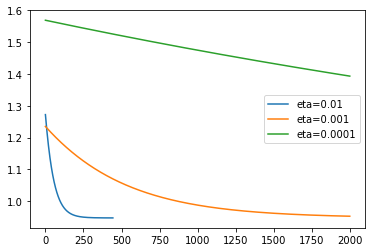

In [11]:
#Now using 20th model to compare effect of learning rate on GD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.001
eta3=0.0001

final_theta2, past_costs_train2, past_costs_test2, past_rmse_train_grad_desc2, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3, past_costs_train3, past_costs_test3, past_rmse_train_grad_desc3, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)

plt.plot(past_rmse_train_grad_desc[19], label="eta=0.01")
plt.plot(past_rmse_train_grad_desc2, label="eta=0.001")
plt.plot(past_rmse_train_grad_desc3, label="eta=0.0001")
plt.legend()


In [12]:
# STOCHASTIC GRADIENT DESCENT FUNCTION DEFINITION

def stoch_grad(x, y, iterations, eta, x_test, y_test, precis):
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):
        j=np.random.randint(0,x.shape[0]-1)
        row_j = np.matrix(x[j])
        prediction = np.matmul(row_j, theta)
        xT = row_j.transpose()
        diff = prediction - np.matrix(y[j])
        theta = theta - eta*np.matmul(xT, diff)
        
        diff_train = np.matmul(x, theta)-y
        cost_train = (1/(2*m))*(np.matmul(diff_train.T, diff_train))
        cost_val_train = np.array(cost_train)[0][0]
        past_costs_train.append(cost_val_train)
        past_rmse_train.append(np.sqrt(2*cost_val_train))
        
        diff_test = np.matmul(x_test, theta)-y_test
        cost_test = (1/(2*n))*(np.matmul(diff_test.T, diff_test))
        cost_val_test = np.array(cost_test)[0][0]
        past_costs_test.append(cost_val_test)
        past_rmse_test.append(np.sqrt(2*cost_val_test))
        
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test   

            

In [13]:
# STOCHASTIC GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_sgd = [None]*20
past_rmse_test_sgd = [None]*20
past_costs_train_gd = [None]*20
past_costs_test_gd = [None]*20
precision = 0.000001
eta = 0.01
iterations = 2000
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta, past_costs_train_gd[i], past_costs_test_gd[i], past_rmse_train_sgd[i], past_rmse_test_sgd[i] = gradient_descent(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    print ("Error values (every 50th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_sgd[i])): 
        if x%50==0:
            print(past_rmse_train_sgd[i][x], sep = "\n") 
    print ("\n")


Error values (every 50th iteration) for model number 1 :-

1.3121290761437545
1.102892891810044
1.0165680247123927
0.9833358168897026
0.9709438353247551
0.9663751853393124
0.964695192613791
0.9640769608408583
0.9638490119359491


Error values (every 50th iteration) for model number 2 :-

1.0995566036382027
1.0029025900067878
0.9634077670936804
0.947660684035073
0.9414108417717932
0.9389210437179076
0.9379229084884124
0.9375201753423308
0.9373567369851503


Error values (every 50th iteration) for model number 3 :-

1.234303203458685
1.0640987669723554
0.998511295896238
0.9745386241121854
0.9659128560296867
0.9628018881121494
0.9616689097878875
0.961251066316967
0.9610948649590428


Error values (every 50th iteration) for model number 4 :-

1.279389771889644
1.0765116814875793
0.9982310164362761
0.9699417577114642
0.9599611228755351
0.9564520550439267
0.9552126858280786
0.9547717688133878
0.9546136627726709


Error values (every 50th iteration) for model number 5 :-

1.3394104612923254
1

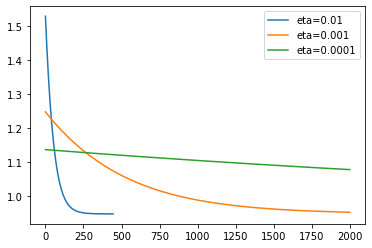

In [14]:
#Now using 20th model to compare effect of learning rate on SGD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.001
eta3=0.0001

final_theta2, past_costs_train2, past_costs_test2, past_rmse_train_sgd2, past_rmse_test_sgd3 = gradient_descent(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3, past_costs_train3, past_costs_test3, past_rmse_train_sgd3, past_rmse_test_sgd3 = gradient_descent(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)

plt.plot(past_rmse_train_sgd[19], label="eta=0.01")
plt.plot(past_rmse_train_sgd2, label="eta=0.001")
plt.plot(past_rmse_train_sgd3, label="eta=0.0001")
plt.legend()

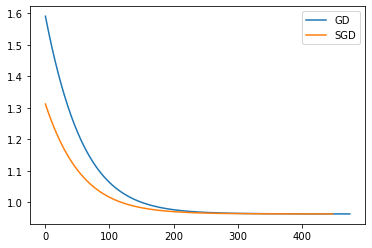

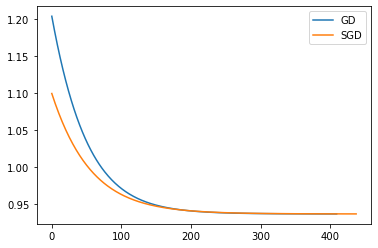

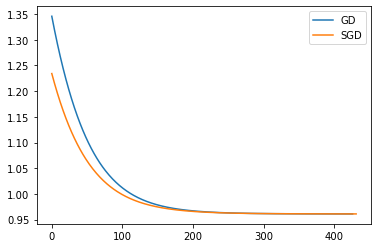

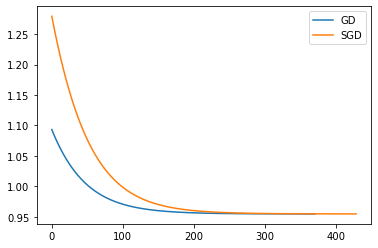

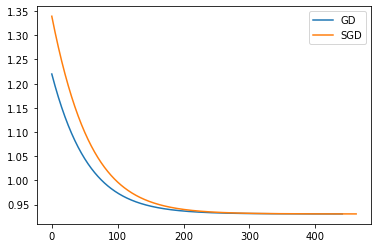

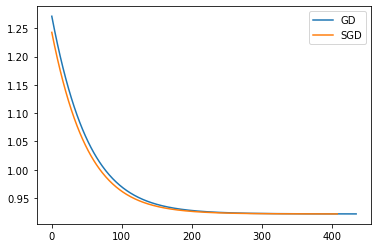

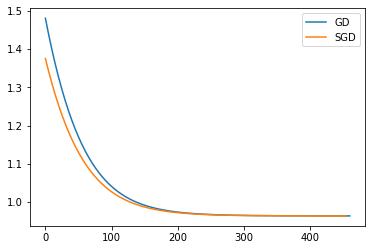

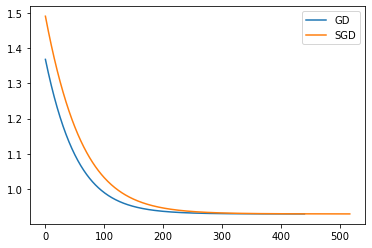

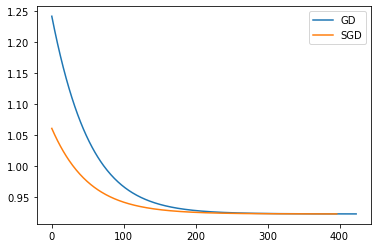

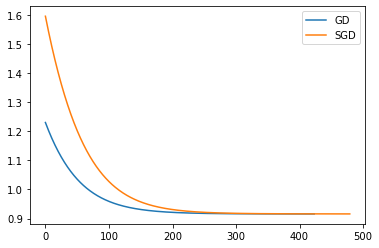

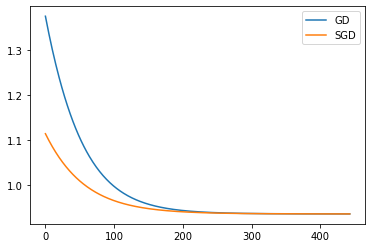

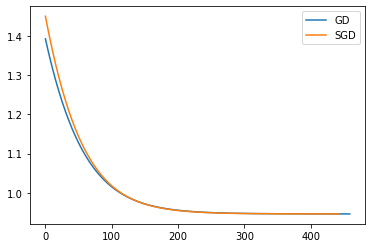

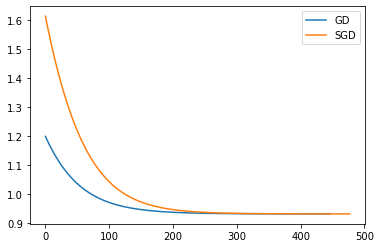

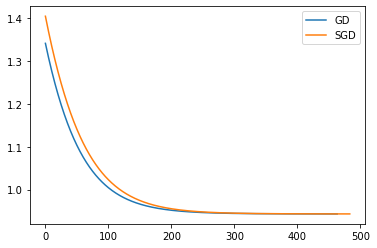

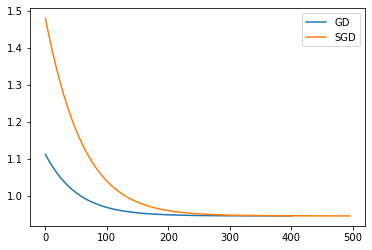

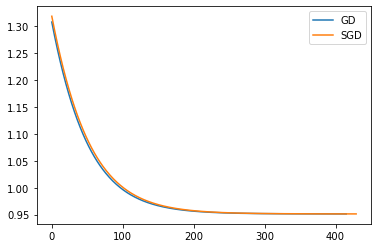

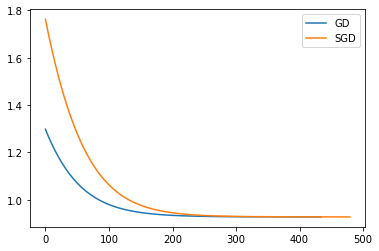

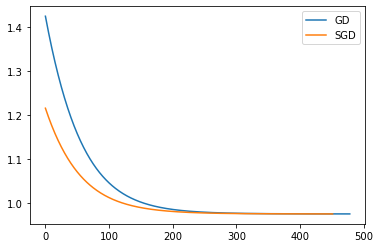

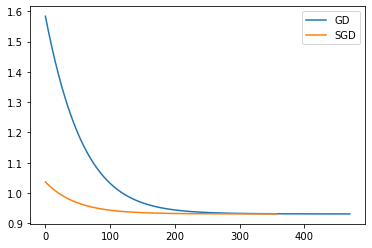

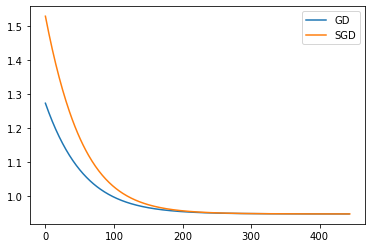

In [15]:
#Now comparing GD and SGD for all 20 models
for x in range(20):
    plt.figure()
    plt.plot(past_rmse_train_grad_desc[x], label="GD")
    plt.plot(past_rmse_train_sgd[x], label="SGD")
    plt.legend()


In [16]:
#Creating data frame to highlight min rmse across the models
min_rmse_train_table_gd=[None]*20
min_rmse_test_table_gd=[None]*20
min_rmse_train_table_sgd=[None]*20
min_rmse_test_table_sgd=[None]*20
for x in range(20):
    min_rmse_train_table_gd[x]=past_rmse_train_grad_desc[x][len(past_rmse_train_grad_desc[x])-1]
    min_rmse_test_table_gd[x]=past_rmse_test_grad_desc[x][len(past_rmse_test_grad_desc[x])-1]
    min_rmse_train_table_sgd[x]=past_rmse_train_sgd[x][len(past_rmse_train_sgd[x])-1]
    min_rmse_test_table_sgd[x]=past_rmse_test_sgd[x][len(past_rmse_test_sgd[x])-1]

df = pd.DataFrame(list(zip(training_err_norm , min_rmse_train_table_gd, min_rmse_train_table_sgd, testing_err_norm ,  min_rmse_test_table_gd, min_rmse_test_table_sgd)), 
     index =['1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], columns =['NE train', 'GD train' , 'SGD train' , 'NE test', 'GD test' , 'SGD test']) 
df

,NE train,GD train,SGD train,NE test,GD test,SGD test
1,0.963715,0.963765,0.963767,0.874477,0.874916,0.875065
2,0.937244,0.937294,0.937302,0.943646,0.944877,0.944392
3,0.960998,0.961047,0.961052,0.884650,0.884604,0.885309
4,0.954524,0.954573,0.954575,0.897568,0.897660,0.897777
5,0.930749,0.930804,0.930803,0.958621,0.958319,0.958709
6,0.921661,0.921716,0.921710,0.974654,0.974982,0.974598
7,0.963838,0.963889,0.963888,0.883824,0.883325,0.884407
8,0.929873,0.929925,0.929934,0.962175,0.961123,0.960019
9,0.923352,0.923403,0.923408,0.971774,0.971384,0.971790
10,0.915842,0.915894,0.915894,0.990108,0.988873,0.988796


In [17]:
#Trying to figure out the best algorithm
wins_NE_train=0
wins_GD_train=0
wins_SGD_train=0
wins_NE_test=0
wins_GD_test=0
wins_SGD_test=0
for x in range(20):
    if(training_err_norm[x]<min(min_rmse_train_table_gd[x],min_rmse_train_table_sgd[x])):
        wins_NE_train+=1
    elif(min_rmse_train_table_gd[x]<min(training_err_norm[x],min_rmse_train_table_sgd[x])):
        wins_GD_train+=1
    else:
        wins_SGD_train+=1
            
    if(testing_err_norm[x]<min(min_rmse_test_table_gd[x],min_rmse_test_table_sgd[x])):
        wins_NE_test+=1
            
    elif(min_rmse_test_table_gd[x]<min(testing_err_norm[x],min_rmse_test_table_sgd[x])):
        wins_GD_test+=1
    else:
        wins_SGD_test+=1        

wins = {'Number of training wins':[wins_NE_train, wins_GD_train, wins_SGD_train], 'Number of testing wins':[wins_NE_test, wins_GD_test, wins_SGD_test]}
df = pd.DataFrame(wins,index=['NE','GD','SGD'])
df

,Number of training wins,Number of testing wins
NE,20,6
GD,0,5
SGD,0,9
